In [1]:
#Unit Root Testing
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

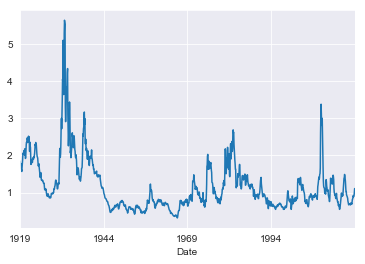

In [2]:
import pandas as pd
import statsmodels.api as sm

import arch.data.default

default_data = arch.data.default.load()
default = default_data.BAA.copy()
default.name = 'default'
default = default - default_data.AAA.values
fig = default.plot()

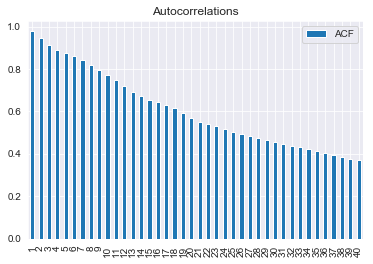

In [3]:
acf = pd.DataFrame(sm.tsa.stattools.acf(default), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

In [4]:
# Augmented Dickey-Fuller Testing

#The Augmented Dickey-Fuller test is the most common unit root test used. 
# It is a regression of the first difference of the variable on its lagged 
# level as well as additional lags of the first difference. The null 
# is that the series contains a unit root, and the (one-sided) alternative is that the series is stationary.

#By default, the number of lags is selected by minimizing the AIC across 
# a range of lag lengths (which can be set using max_lag when initializing the model). 
# Additionally, the basic test includes a constant in the ADF regression.

#These results indicate that the Default premium is stationary.

from arch.unitroot import ADF

adf = ADF(default)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.356
P-value                         0.013
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
# Setting the number of lags
adf.lags = 5
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.582
P-value                         0.006
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [10]:
# The deterministic terms can be altered using trend. The options are:

# 'nc' : No deterministic terms
# 'c' : Constant only
# 'ct' : Constant and time trend
# 'ctt' : Constant, time trend and time-trend squared

adf.trend = 'ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.786
P-value                         0.017
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [11]:
reg_res = adf.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     17.83
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           1.30e-22
Time:                        09:22:03   Log-Likelihood:                 630.15
No. Observations:                1194   AIC:                            -1244.
Df Residuals:                    1186   BIC:                            -1204.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0248      0.007     -3.786      0.0

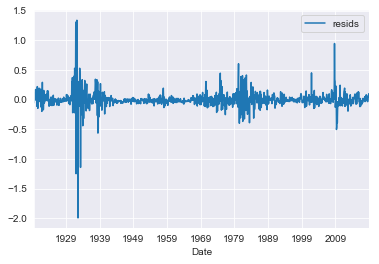

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

resids = pd.DataFrame(reg_res.resid)
resids.index = default.index[6:]
resids.columns = ['resids']
fig = resids.plot()

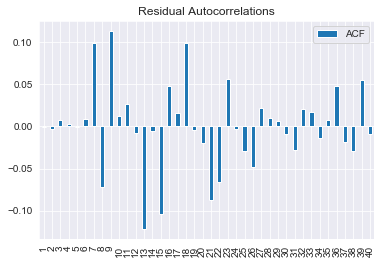

In [13]:
# Since the number lags was directly set, it is good to check whether the residuals appear to be white noise.
acf = pd.DataFrame(sm.tsa.stattools.acf(reg_res.resid), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Residual Autocorrelations')

In [14]:
# Dickey-Fuller GLS Testing

# The Dickey-Fuller GLS test is an improved version of the ADF which uses a GLS-detrending 
# regression before running an ADF regression with no additional deterministic terms. 
# This test is only available with a constant or constant and time trend (trend='c' or trend='ct').

# The results of this test agree with the ADF results.

from arch.unitroot import DFGLS

dfgls = DFGLS(default)
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.322
P-value                         0.020
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [15]:
dfgls.trend = 'ct'
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -3.464
P-value                         0.009
Lags                               21
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.43 (1%), -2.86 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [16]:
# Phillips-Perron Testing
#The Phillips-Perron test is similar to the ADF except that the regression run does not 
#include lagged values of the first differences. Instead, the PP test fixed the 
#t-statistic using a long run variance estimation, implemented using a Newey-West covariance estimator.

# By default, the number of lags is automatically set, although this can be overridden using lags.

from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(default)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.898
P-value                         0.002
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [17]:
pp.lags = 12
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.024
P-value                         0.001
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [18]:
pp.trend = 'ct'
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.262
P-value                         0.004
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [19]:
# PP testing framework includes two types of tests. 
# One which uses an ADF-type regression of the first difference on the level, 
# the other which regresses the level on the level. 
# The default is the tau test, which is similar to an ADF regression, 
# although this can be changed using test_type='rho'.

pp.test_type = 'rho'
print(pp.summary().as_text())

     Phillips-Perron Test (Z-rho)    
Test Statistic                -36.114
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.16 (1%), -21.60 (5%), -18.17 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [22]:
#KPSS Testing

# The KPSS test differs from the three previous in that the null is a stationary 
# process and the alternative is a unit root.

#  Note that here the null is rejected which indicates that the series might be a unit root.
from arch.unitroot import KPSS

kpss = KPSS(default)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  1.088
P-value                         0.002
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [23]:
#Changing the trend does not alter the conclusion.
kpss.trend = 'ct'
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.393
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [24]:
# Zivot-Andrews TesT

# The Zivot-Andrews test allows the possibility of a single structural break in the series. 
# Here we test the default using the test.

from arch.unitroot import ZivotAndrews

za = ZivotAndrews(default)
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -4.900
P-value                         0.040
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


In [25]:
# Variance Ratio Testing

# Variance ratio tests are not usually used as unit root tests, 
# and are instead used for testing whether a financial return 
# series is a pure random walk versus having some predictability. 

import numpy as np
import pandas as pd
import arch.data.frenchdata
ff = arch.data.frenchdata.load()
excess_market = ff.iloc[:, 0]  # Excess Market
print(ff.describe())

            Mkt-RF          SMB          HML           RF
count  1109.000000  1109.000000  1109.000000  1109.000000
mean      0.659946     0.206555     0.368864     0.274220
std       5.327524     3.191132     3.482352     0.253377
min     -29.130000   -16.870000   -13.280000    -0.060000
25%      -1.970000    -1.560000    -1.320000     0.030000
50%       1.020000     0.070000     0.140000     0.230000
75%       3.610000     1.730000     1.740000     0.430000
max      38.850000    36.700000    35.460000     1.350000


In [26]:
# The variance ratio compares the variance of a 1-period return to that of a multi-period return. The comparison length has to be set when initializing the test.

# compares 1-month to 12-month returns, and the null that the series is a pure random walk is rejected. Negative values indicate some positive autocorrelation in the returns (momentum).


from arch.unitroot import VarianceRatio
vr = VarianceRatio(excess_market, 12)
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -5.029
P-value                         0.000
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)


In [27]:
warnings.simplefilter('always')  # Restore warnings

vr.overlap = False
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -6.206
P-value                         0.000
Lags                               12
-------------------------------------

Computed with non-overlapping blocks


/usr/local/lib/python3.7/site-packages/arch/unitroot/unitroot.py:1657: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/arch/unitroot/unitroot.py:1706: InvalidLengthWarning: 
The length of y is not an exact multiple of 12, and so the final
4 observations have been dropped.

  InvalidLengthWarning,
